### Test ---> To test for this heteroscedasticity, the Lagrange Multiplier (LM) test proposed by Engle (1982) is applied on ARIMA residuals

### 4. Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


us_euro_uk_inr = pd.read_csv('Forex_data_preprocessed.csv',index_col=0)
us_euro_uk_inr.index = pd.DatetimeIndex(us_euro_uk_inr.index)
us_euro_uk_inr = us_euro_uk_inr.asfreq('b')
us_euro_uk_inr

,USD_EU,EU_GBP,INR_EU,EU_STOXX50,UK_FTSE100,US_SP500,INR_NIFTY50,Gold_USD,Crude_oil_USD
2000-01-03,1.0155,1.6022,44.2250,4849.22,6665.86,145.44,1592.20,282.7,25.55
2000-01-04,1.0309,1.5879,44.8957,4657.83,6665.86,139.75,1638.70,282.7,25.55
2000-01-05,1.0335,1.5883,45.0089,4541.75,6535.90,140.00,1595.80,281.1,24.91
2000-01-06,1.0324,1.5958,44.9610,4500.69,6447.24,137.75,1617.60,281.4,24.78
2000-01-07,1.0294,1.5916,44.8304,4648.27,6504.75,145.75,1613.30,281.9,24.22
...,...,...,...,...,...,...,...,...,...
2020-05-11,1.0818,1.1398,82.0762,2883.75,5939.73,292.50,9239.20,1698.0,24.14
2020-05-12,1.0864,1.1321,81.5126,2884.20,5994.77,286.67,9196.55,1706.8,25.78
2020-05-13,1.0837,1.1281,81.6351,2810.55,5904.05,281.60,9383.55,1716.4,25.29
2020-05-14,1.0800,1.1291,81.5184,2760.23,5741.54,284.97,9142.75,1740.9,27.56


##### GARCH

In [3]:
from arch import arch_model

arch_model = arch_model(us_euro_uk_inr.INR_EU.diff().iloc[1:5284], mean='AR', vol='GARCH', p=1, q=2)

arch_model = arch_model.fit(update_freq=10)
print(arch_model.summary())


Iteration:     10,   Func. Count:     86,   Neg. LLF: 2457.024026703745
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2456.997353906802
            Iterations: 14
            Function evaluations: 114
            Gradient evaluations: 14
                           AR - GARCH Model Results                           
Dep. Variable:                 INR_EU   R-squared:                      -0.000
Mean Model:                        AR   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -2457.00
Distribution:                  Normal   AIC:                           4923.99
Method:            Maximum Likelihood   BIC:                           4956.86
                                        No. Observations:                 5283
Date:                Tue, Aug 04 2020   Df Residuals:                     5278
Time:                        22:39:27   Df Model:                            5
      

Forecast for next 10 horizons 

In [311]:
var_forecat = arch_model.forecast(horizon=1).variance.iloc[-1,:].values
var_forecat

array([0.4217328])

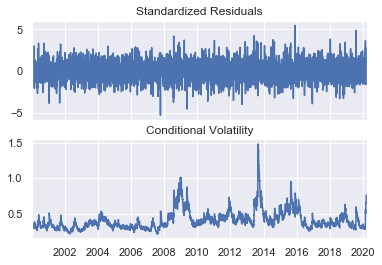

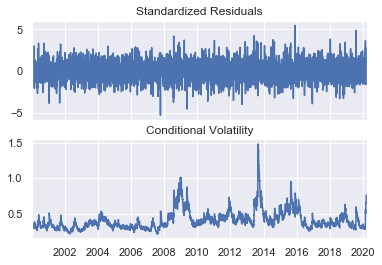

In [312]:
arch_model.plot()

Modeled conditional variance plot

Text(0.5, 1.0, 'GARCH model fitted Volatility')

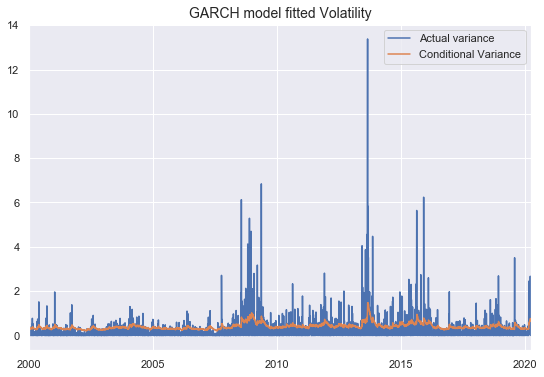

In [4]:
act_var = np.square(us_euro_uk_inr.INR_EU.diff() - np.mean(us_euro_uk_inr.INR_EU.diff()))

pd.DataFrame({'Actual variance':act_var[:-30],'Conditional Variance':arch_model.conditional_volatility}).plot(figsize=(9,6))

plt.title('GARCH model fitted Volatility', size = 14)


Try rolling forecast

In [347]:
from arch import arch_model

forecasted_var = []
for iter in range(30):
    
    garch = arch_model(us_euro_uk_inr.INR_EU.diff().iloc[1:5284+iter], mean='AR', vol='GARCH', p=3, q=3)
    garch = garch.fit(update_freq=100)
    var_forecat = garch.forecast(horizon=1).variance.iloc[-1,:].values
    forecasted_var.append(var_forecat.item())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2451.6948309575887
            Iterations: 19
            Function evaluations: 211
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2452.623271599026
            Iterations: 19
            Function evaluations: 211
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2453.1587133434277
            Iterations: 19
            Function evaluations: 211
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2453.6773147427075
            Iterations: 19
            Function evaluations: 210
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2454.134929081876
            Iterations: 19
            Funct

30


Text(0.5, 1.0, 'GARCH Forecasted Volatility vs Actaual Variance ')

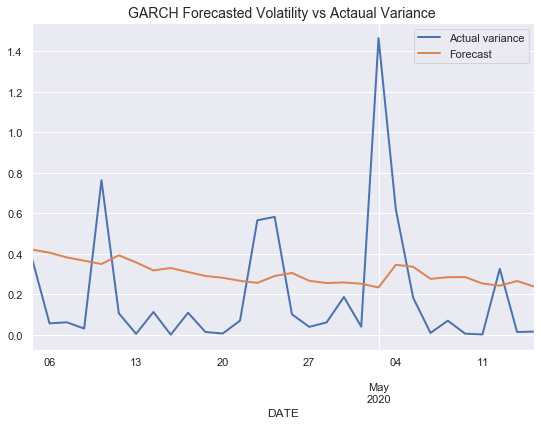

In [349]:
print(len(forecasted_var))
pd.DataFrame({'Actual variance':act_var[-31:-1],'Forecast':forecasted_var}).plot(figsize=(9,6),lw=2)
plt.title('GARCH Forecasted Volatility vs Actaual Variance ', size = 14)

In [296]:
arch_model.conditional_volatility

DATE
2000-01-04    0.311810
2000-01-05    0.348560
2000-01-06    0.325725
2000-01-07    0.324698
2000-01-10    0.317266
                ...   
2020-03-30    0.698709
2020-03-31    0.674392
2020-04-01    0.657745
2020-04-02    0.651075
2020-04-03    0.649384
Freq: B, Name: cond_vol, Length: 5284, dtype: float64